## Question 1: Analysis of percentage turnout of marketing campaign

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
campaign_details=pd.read_csv('Customer_campaign_details_p1.csv')
campaign_details.head()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,telephone,may,mon,307,1,999,0,nonexistent
1,2,telephone,may,mon,198,1,999,0,nonexistent
2,3,telephone,may,mon,139,1,999,0,nonexistent
3,4,telephone,may,mon,217,1,999,0,nonexistent
4,5,telephone,may,mon,380,1,999,0,nonexistent


In [3]:
response=pd.read_csv('Customer_Response_data_p1.csv')
response.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [4]:
response_merged=pd.merge(campaign_details,response,on='Customer_id',how='inner')
response_merged.head(10)

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,telephone,may,mon,380,1,999,0,nonexistent,no
5,6,telephone,may,mon,50,1,999,0,nonexistent,no
6,7,telephone,may,mon,55,1,999,0,nonexistent,no
7,8,telephone,may,mon,222,1,999,0,nonexistent,no
8,9,telephone,may,mon,137,1,999,0,nonexistent,no
9,10,telephone,may,mon,293,1,999,0,nonexistent,no


In [5]:
import matplotlib.pyplot as plt

### Analysis of percentage turnout of marketing campaign

([<matplotlib.patches.Wedge at 0x1c67f84a3d0>,
 [Text(-1.0308429302165034, 0.3838786959739411, 'no'),
  Text(1.1714124411217735, -0.4362257360417056, 'yes')],
 [Text(-0.5622779619362744, 0.20938837962214965, '88.65%'),
  Text(0.702847464673064, -0.2617354416250233, '11.35%')])

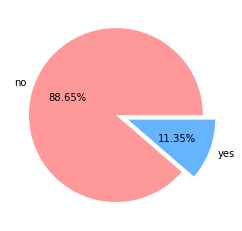

In [19]:
no,yes=response_merged['y'].value_counts()
explode=(0,0.15)
plt.pie([no,yes],labels=['no','yes'],colors=['#ff9999','#66b3ff'],autopct='%.2f%%',explode=explode)

#### From the graph, we can see that the percentage turnout of the marketing campaign is 11.35%

## Task 2.1----Question 2---Right Mode of Contact

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
city=pd.read_csv("City_Master.csv")
customerDetails=pd.read_csv("Customer_and_bank details_p1.csv")
customerPostalCode=pd.read_csv("Customer_Postal_Code_details.csv")
customerResponseData=pd.read_csv("Customer_Response_data_p1.csv")
customerCampaignDetails=pd.read_csv("Customer_campaign_details_p1.csv")
customerSocialEconomicData=pd.read_csv("Customer_social_economic_data_p1.csv")
regionCode=pd.read_csv("Region_code_master.csv")
stateCode=pd.read_csv("State_Master.csv")

In [3]:
customerCampaignDetails=customerCampaignDetails.rename(columns={'Customer_id':'C_id'})
customerDetails=pd.concat([customerDetails,customerCampaignDetails],axis=1)
customerDetails=pd.concat([customerDetails,customerPostalCode],axis=1)
del(customerDetails['customer_id'])
del(customerDetails['C_id'])
df1=pd.DataFrame(customerDetails['Region_Code'])
df2=[regionCode.loc[i][:] for i in [0,1,2,3,4]]
df2=pd.DataFrame(df2)
customerDetails=pd.merge(customerDetails,customerSocialEconomicData,how="left",on='Customer_id')
df1['Region']=df1['Region_Code'].replace(['1','2','3','4','5','Na'],['Central','East','South','West','North','Not_Specified'])
del[df1['Region_Code']]
df1['Customer_id']=customerDetails['Customer_id']
customerDetails=pd.merge(customerDetails,df1,how='inner',on='Customer_id')
 


In [4]:
bank = pd.merge(customerDetails,customerResponseData,how = 'outer')


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [7]:
bank['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [8]:
bank

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Region,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,South,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,South,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0,West,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,South,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,South,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,East,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,0,nonexistent,10011,-1.1,94.767,-50.8,1.028,4963.6,East,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,East,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,0,nonexistent,85254,-1.1,94.767,-50.8,1.028,4963.6,West,yes


In [9]:
bank['contact'].value_counts()/len(bank['contact'])*100

cellular     63.428972
telephone    36.571028
Name: contact, dtype: float64

Note: 63.42 % of the clients were approached through cellular contact and 36.57% of the clients were approached through telephonic communication

In [10]:
print(bank[bank['y']=='yes']['contact'].value_counts()/len(bank[bank['y']=='yes']['contact'])*100)

cellular     82.984791
telephone    17.015209
Name: contact, dtype: float64


Of all the people who have subscribed 82.9% clients were approached through cellular contact and only 17.01% people who were approached through telephone have subscribed. Thus making Celullar Mode of contact the more efficient one

y             no   yes  total       no %      yes %
contact                                            
cellular   20030  3492  23522  85.154324  14.845676
telephone  12846   716  13562  94.720543   5.279457


<AxesSubplot:xlabel='contact'>

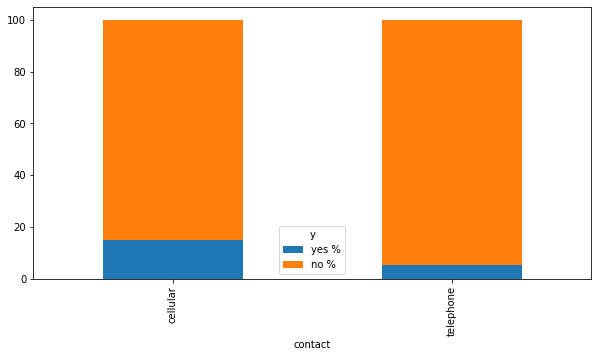

In [13]:
df=pd.crosstab(bank['contact'],bank['y'])
df['total']=df['no']+df['yes']
df['no %']=df['no']/df['total']*100
df['yes %']=df['yes']/df['total']*100
print(df)
df[['yes %','no %']].plot(kind='bar',stacked=True,figsize=(10,5))

Of all the people who have subscribed 82.9% clients were approached through cellular contact and only 17.01% people who were approached through telephone have subscribed. Thus making Celullar Mode of contact the more efficient one

# Question 3: Analysis on attempts made to turn a person into successful depositor

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
campaign_details=pd.read_csv('Customer_campaign_details_p1.csv')
campaign_details.head()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,telephone,may,mon,307,1,999,0,nonexistent
1,2,telephone,may,mon,198,1,999,0,nonexistent
2,3,telephone,may,mon,139,1,999,0,nonexistent
3,4,telephone,may,mon,217,1,999,0,nonexistent
4,5,telephone,may,mon,380,1,999,0,nonexistent


In [3]:
response=pd.read_csv('Customer_Response_data_p1.csv')
response.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [4]:
response_merged=pd.merge(campaign_details,response,on='Customer_id',how='inner')
response_merged.head(10)

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,telephone,may,mon,380,1,999,0,nonexistent,no
5,6,telephone,may,mon,50,1,999,0,nonexistent,no
6,7,telephone,may,mon,55,1,999,0,nonexistent,no
7,8,telephone,may,mon,222,1,999,0,nonexistent,no
8,9,telephone,may,mon,137,1,999,0,nonexistent,no
9,10,telephone,may,mon,293,1,999,0,nonexistent,no


### Analysis on the attempts

In [5]:
max_attempts=response_merged.query("y=='yes'")['campaign'].max()
min_attempts=response_merged.query("y=='yes'")['campaign'].min()
avg=response_merged.query("y=='yes'")['campaign'].mean()
print('Maximum attempts:',max_attempts)
print('Minimum attempts:',min_attempts)
print('Average of attempts:',int(avg))

Maximum attempts: 23
Minimum attempts: 1
Average of attempts: 2


In [6]:
import matplotlib.pyplot as plt

In [14]:
yes=pd.Series(response_merged.query("y=='yes'")['campaign'])

<Figure size 1440x1440 with 0 Axes>

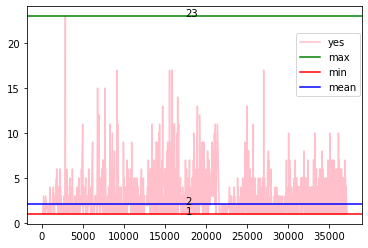

In [15]:
plt.figure(figsize=(20,20))
df = pd.DataFrame({'yes':yes})
df.plot(color='pink')
plt.axhline(df.yes.max(),color='green',label='max')
plt.axhline(df.yes.min(),color='red',label='min')
plt.axhline(df.yes.mean(),color='blue',label='mean')
plt.text(17500,df.yes.max(), df.yes.max())
plt.text(17500,df.yes.min(), df.yes.min())
plt.text(17500,df.yes.mean(), int(df.yes.mean()))
plt.legend(bbox_to_anchor = (0.9, 0.9), loc = 'upper center')
plt.show()

#### From the graph, we can see that the minimum number of attempts is 1, the maximum is 23 and the average is 2 to make a person into successful depositor

# Question4: Personal data analysis on marital status, existing loans, education, profession etc. and its impact on the campaign’s success.

In [9]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from matplotlib import style
os.chdir("C:\\Users\\hsumukh\\Desktop\\Training\\Capstone Project1_Marketing Data\\Marketing_Campaign_P1")

Displaying the Tables

In [10]:
df0=pd.read_csv('Customer_campaign_details_p1.csv')
df0
df0.head()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,telephone,may,mon,307,1,999,0,nonexistent
1,2,telephone,may,mon,198,1,999,0,nonexistent
2,3,telephone,may,mon,139,1,999,0,nonexistent
3,4,telephone,may,mon,217,1,999,0,nonexistent
4,5,telephone,may,mon,380,1,999,0,nonexistent


In [11]:
df1 = pd.read_csv('Customer_and_bank details_p1.csv')
df1
df1.head()


,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
0,1,56,services,married,high.school,no,no,yes,3,S1,C1
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3
4,5,24,technician,single,professional.course,no,yes,no,3,S3,C3


In [12]:
df2 = pd.read_csv('Customer_Response_data_p1.csv')
df2
df2.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


Merging Customer_and_bank details_p1.csv and Customer_Response_data_p1.csv(tables)


In [13]:
grouph=pd.merge(df1,df2,on='Customer_id',how='inner')
grouph.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y
0,1,56,services,married,high.school,no,no,yes,3,S1,C1,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,C3,no


Analysis on martial status based on responses

Analysis on loan based on responses

Text(0.5, 1.0, 'Analysis on martial status based on responses')

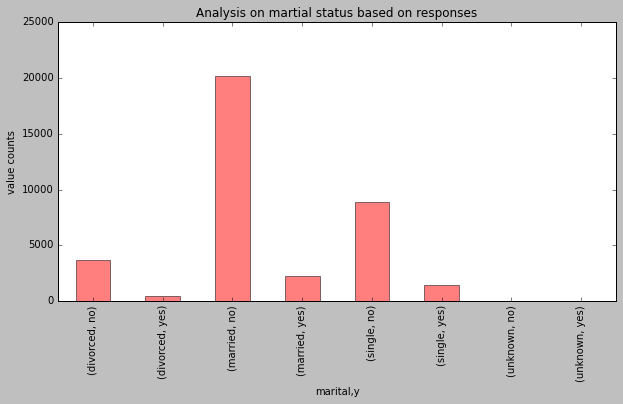

In [15]:
style.use('grayscale')
grouph1=grouph.groupby('marital')['y'].value_counts()
grouph1
grouph1.plot.bar(color='red',alpha=0.5,figsize=(10,5))
plt.ylabel('value counts')
plt.title('Analysis on martial status based on responses')





Analysis on loan based on responses

Text(0.5, 1.0, 'Analysis on existing loans based on responses')

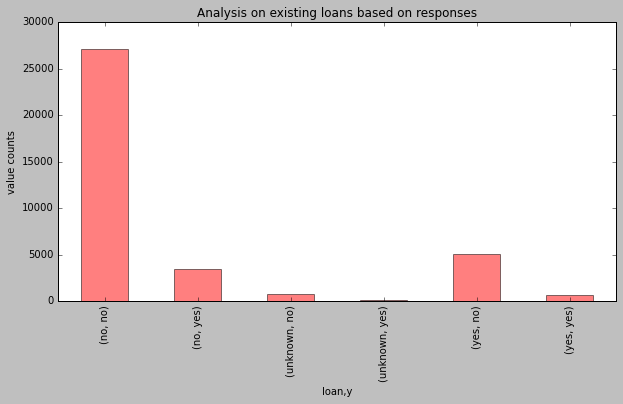

In [16]:
grouph2=grouph.groupby('loan')['y'].value_counts()
grouph2
grouph2.plot.bar(color='red',alpha=0.5,figsize=(10,5))
plt.ylabel('value counts')
plt.title('Analysis on existing loans based on responses')



Analysis on education based on responses

Text(0.5, 1.0, 'Analysis on education based on responses')

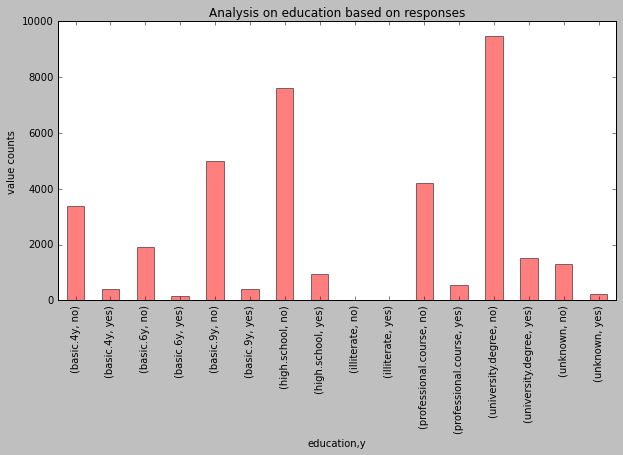

In [18]:
grouph3=grouph.groupby('education')['y'].value_counts()
grouph3
grouph3.plot.bar(color='red',alpha=0.5,figsize=(10,5))
plt.ylabel('value counts')
plt.title('Analysis on education based on responses')


Analysis on profession based on responses

Text(0.5, 1.0, 'Analysis on profession based on responses')

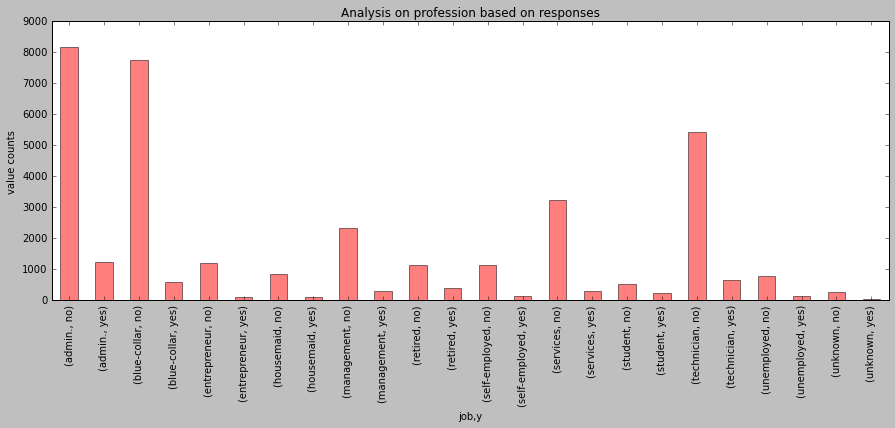

In [20]:
grouph4=grouph.groupby('job')['y'].value_counts()
grouph4
grouph4.plot.bar(color='red',alpha=0.5,figsize=(15,5))
plt.ylabel('value counts')
plt.title('Analysis on profession based on responses')


Analysis on housing based on responses

Text(0.5, 1.0, 'Analysis on education based on responses')

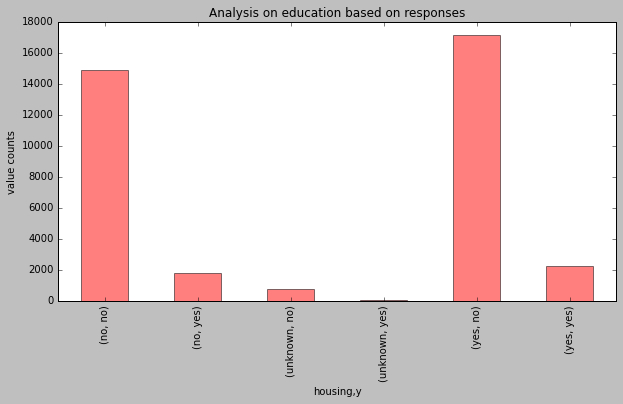

In [22]:
grouph5=grouph.groupby('housing')['y'].value_counts()
grouph5
grouph5.plot.bar(color='red',alpha=0.5,figsize=(10,5))
plt.ylabel('value counts')
plt.title('Analysis on education based on responses')


Analysis on age based on responses

Merging Customer_and_bank details_p1.csv and Customer_Campaign_data_p1.csv(tables)

In [23]:
group=pd.merge(df0,df1,on='Customer_id',how='inner')
group
group.head()


,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
0,1,telephone,may,mon,307,1,999,0,nonexistent,56,services,married,high.school,no,no,yes,3,S1,C1
1,2,telephone,may,mon,198,1,999,0,nonexistent,45,services,married,basic.9y,unknown,no,no,3,S1,C1
2,3,telephone,may,mon,139,1,999,0,nonexistent,59,admin.,married,professional.course,no,no,no,4,S2,C2
3,4,telephone,may,mon,217,1,999,0,nonexistent,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3
4,5,telephone,may,mon,380,1,999,0,nonexistent,24,technician,single,professional.course,no,yes,no,3,S3,C3


In [24]:
group['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)


Calculating percentage on martial status analysis

Text(0.5, 1.0, 'The percentage turnout of maritalstatus')

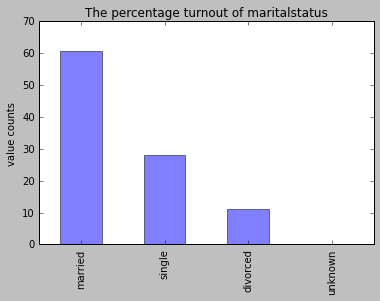

In [26]:
percent = group['marital'].value_counts()/len(group['marital'])*100
percent

percent.plot.bar(color='blue',alpha=0.5)
plt.ylabel('value counts')
plt.title('The percentage turnout of maritalstatus')



In [30]:
group['marital'].value_counts()

married     22479
single      10407
divorced     4126
unknown        72
Name: marital, dtype: int64

Calculating percentage on existing loan analysis

Text(0.5, 1.0, 'The percentage turnout of existing loans')

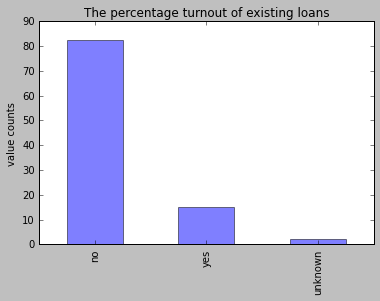

In [31]:
percent1 = group['loan'].value_counts()/len(group['loan'])*100
percent1
percent1.plot.bar(color='blue',alpha=0.5)
plt.ylabel('value counts')
plt.title('The percentage turnout of existing loans')


Analysis on education based on poutcome

Calculating percentage on education analysis

Text(0.5, 1.0, 'The percentage turnout of education')

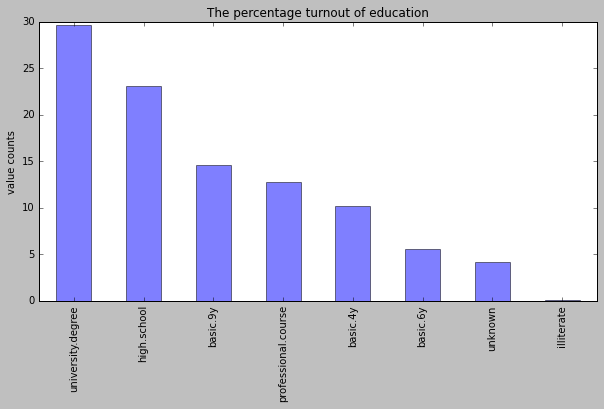

In [33]:
percent2 = group['education'].value_counts()/len(group['education'])*100
percent2
percent2.plot.bar(color='blue',alpha=0.5,figsize=(10,5))
plt.ylabel('value counts')
plt.title('The percentage turnout of education')


Calculating percentage on profession analysis

Text(0.5, 1.0, 'The percentage turnout of profession')

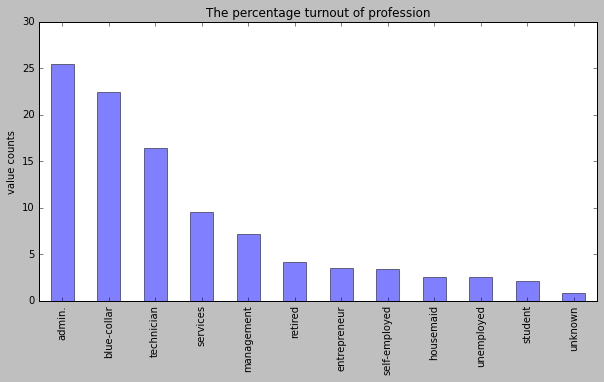

In [35]:
percent4= group['job'].value_counts()/len(group['job'])*100
percent4
percent4.plot.bar(color='blue',alpha=0.5,figsize=(10,5))
plt.ylabel('value counts')
plt.title('The percentage turnout of profession')

Analysis on housing based on poutcome

Calculating percentage on housing analysis

Text(0.5, 1.0, 'The percentage turnout of housing')

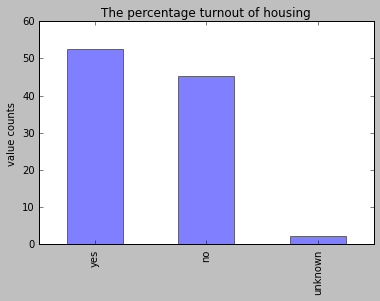

In [36]:
percent3 = group['housing'].value_counts()/len(group['housing'])*100
percent3
percent3.plot.bar(color='blue',alpha=0.5)
plt.ylabel('value counts')
plt.title('The percentage turnout of housing')


# Question5:Socio-economical analysis of the customers.

In [37]:
SocioEconomicData=pd.read_csv('Customer_social_economic_data_p1.csv') 
SocioEconomicData


,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1.1,93.994,-36.4,4.857,5191.0
1,2,1.1,93.994,-36.4,4.857,5191.0
2,3,1.1,93.994,-36.4,4.857,5191.0
3,4,1.1,93.994,-36.4,4.857,5191.0
4,5,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...
37079,37080,-1.1,94.767,-50.8,1.028,4963.6
37080,37081,-1.1,94.767,-50.8,1.028,4963.6
37081,37082,-1.1,94.767,-50.8,1.028,4963.6
37082,37083,-1.1,94.767,-50.8,1.028,4963.6


Counting the number of employees with Negative and Positive variation rate

In [38]:
Neg_Var_rate=SocioEconomicData[SocioEconomicData['emp.var.rate']<0].shape[0]
Pos_var_rate=SocioEconomicData[SocioEconomicData['emp.var.rate']>0].shape[0]

In [39]:
print("Among the total of ",Neg_Var_rate+Pos_var_rate,' employees')
print(f'The number of employess with negative variation rate is {Neg_Var_rate} which is {round(Neg_Var_rate*100/len(SocioEconomicData),2)} %\nThe number of employees with positive variation rate is {Pos_var_rate}  which is {round(Pos_var_rate*100/len(SocioEconomicData),2)} %')

Among the total of  37084  employees
The number of employess with negative variation rate is 15486 which is 41.76 %
The number of employees with positive variation rate is 21598  which is 58.24 %


<AxesSubplot:ylabel='Frequency'>

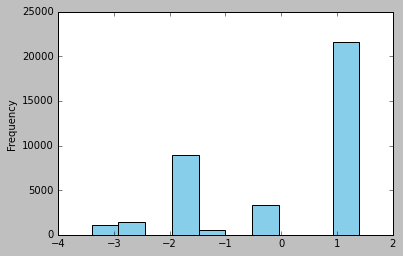

In [41]:
SocioEconomicData['emp.var.rate'].plot(kind='hist',color='skyblue')

In [42]:

group7=pd.merge(df2,SocioEconomicData,on='Customer_id',how='inner')
group7
group7.head()

,Customer_id,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,no,1.1,93.994,-36.4,4.857,5191.0
1,2,no,1.1,93.994,-36.4,4.857,5191.0
2,3,no,1.1,93.994,-36.4,4.857,5191.0
3,4,no,1.1,93.994,-36.4,4.857,5191.0
4,5,no,1.1,93.994,-36.4,4.857,5191.0


# -----Question 6---Demographic Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
city=pd.read_csv("City_Master.csv")
customerDetails=pd.read_csv("Customer_and_bank details_p1.csv")
customerPostalCode=pd.read_csv("Customer_Postal_Code_details.csv")
customerResponseData=pd.read_csv("Customer_Response_data_p1.csv")
customerCampaignDetails=pd.read_csv("Customer_campaign_details_p1.csv")
customerSocialEconomicData=pd.read_csv("Customer_social_economic_data_p1.csv")
regionCode=pd.read_csv("Region_code_master.csv")
stateCode=pd.read_csv("State_Master.csv")

In [4]:
customerCampaignDetails=customerCampaignDetails.rename(columns={'Customer_id':'C_id'})
customerDetails=pd.concat([customerDetails,customerCampaignDetails],axis=1)
customerDetails=pd.concat([customerDetails,customerPostalCode],axis=1)
del(customerDetails['customer_id'])
del(customerDetails['C_id'])
df1=pd.DataFrame(customerDetails['Region_Code'])
df2=[regionCode.loc[i][:] for i in [0,1,2,3,4]]
df2=pd.DataFrame(df2)
customerDetails=pd.merge(customerDetails,customerSocialEconomicData,how="left",on='Customer_id')
df1['Region']=df1['Region_Code'].replace(['1','2','3','4','5','Na'],['Central','East','South','West','North','Not_Specified'])
del[df1['Region_Code']]
df1['Customer_id']=customerDetails['Customer_id']
customerDetails=pd.merge(customerDetails,df1,how='inner',on='Customer_id')
 


In [5]:
bank = pd.merge(customerDetails,customerResponseData,how = 'outer')


In [6]:
bank.describe()

,Customer_id,age,duration,campaign,pdays,previous,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,55202.625553,0.082669,93.576076,-40.505183,3.621668,5167.058664
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,32057.300954,1.568997,0.578493,4.622045,1.733972,72.196605
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,1040.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,23223.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,56301.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,90008.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,99301.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


###### Based on the region_names from the Region_code_master csv file:

In [7]:
bank['Region'].unique()

array(['South', 'West', 'Not_Specified', 'Central', 'East'], dtype=object)

## What is the count of customers from each location(region):

##### Central_region:

In [8]:
Region_central = bank[bank['Region'] == 'Central']
round(Region_central['Customer_id'].count(),2)


8590

##### South_region:

In [9]:
Region_South = bank[bank['Region'] == 'South']
round(Region_South['Customer_id'].count(),2)

5992

##### West_region:

In [10]:
Region_west = bank[bank['Region'] == 'West']
round(Region_west['Customer_id'].count(),2)

11884

##### North_region:

In [11]:
Region_north = bank[bank['Region'] == 'North']
round(Region_north['Customer_id'].count(),2)

0

Note: As you can see there are no customers from North Region. Thus, no need of analysis of this region.

##### East_region:

In [12]:
Region_east = bank[bank['Region'] == 'East']
round(Region_east['Customer_id'].count(),2)

10558

##### Not_Specified_region:

In [13]:
Region_ns = bank[bank['Region'] == 'Not_Specified']
round(Region_ns['Customer_id'].count(),2)

60

C:\Users\ukfarooq\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

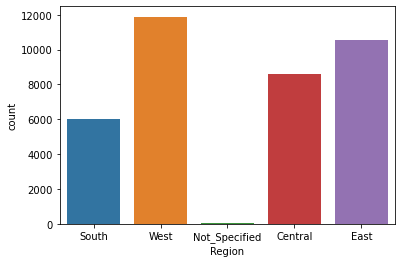

In [14]:
sns.countplot(bank['Region'])

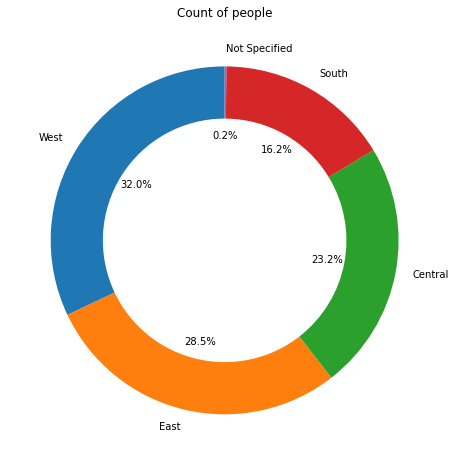

In [15]:
labels = ['West','East','Central','South','Not Specified']
plt.figure(figsize=(10,8))
plt.pie(bank["Region"].value_counts(), labels=labels, wedgeprops={'width':0.3}, startangle=90, autopct='%1.1f%%')
plt.title("Count of people")
plt.show()

# What Is The Average Age in all the Regions:

#### Central_Region:

In [16]:

from matplotlib import style

40.14 is the average age in Central Region.


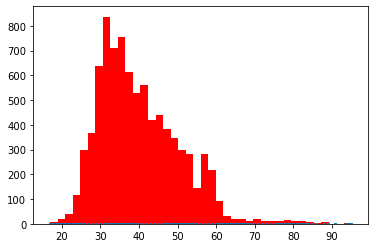

In [17]:
Region_central = bank[bank['Region'] == 'Central']

plt.hist(Region_central.age,bins=40, color="red", alpha=1.0,histtype='barstacked')
print(round(Region_central['age'].mean(),2),'is the average age in Central Region.')
fig = plt.bar(Region_central.age,height=2)



40.03 is the average age in East Region.


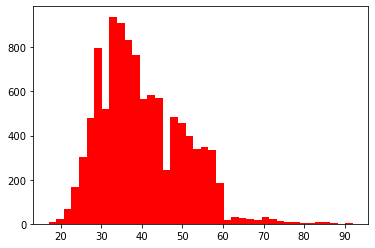

In [18]:
Region_east = bank[bank['Region'] == 'East']
round(Region_east['age'].mean(),2)


plt.hist(Region_east.age,bins=40, color="red", alpha=1.0)
print(round(Region_east['age'].mean(),2),'is the average age in East Region.')

#### Region not Specified:

39.5 is the average age in Region:Not_specified.


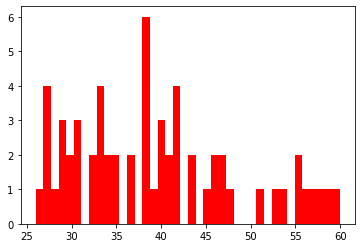

In [19]:
Region_Not_specified = bank[bank['Region'] == 'Not_Specified']

plt.hist(Region_Not_specified.age, bins=40, color="red", alpha=1.0)
print(round(Region_Not_specified['age'].mean(),2),'is the average age in Region:Not_specified.')


#### South_Region:

40.08 is the average age in Region_South.


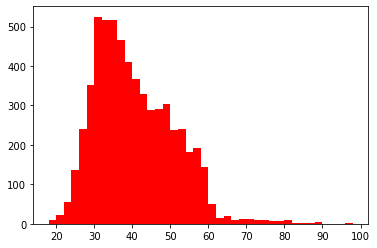

In [20]:
Region_South = bank[bank['Region'] == 'South']

plt.hist(Region_South.age,bins=40,  color="red", alpha=1.0)
print(round(Region_South['age'].mean(),2),'is the average age in Region_South.')


#### West_Region:

39.97 is the average age in Region_West.


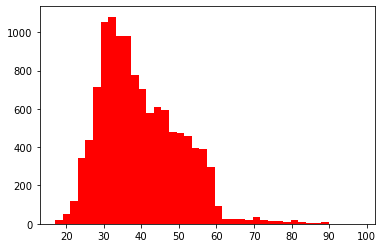

In [21]:
Region_West = bank[bank['Region'] == 'West']
round(Region_West['age'].mean(),2)
plt.hist(Region_West.age,bins=40,  color="red", alpha=1.0)
print(round(Region_West['age'].mean(),2),'is the average age in Region_West.')


# What Is The Percentage distribution Of education level In all the Regions?

In [22]:
Region_central.education.unique()


array(['basic.9y', 'basic.4y', 'unknown', 'university.degree',
       'high.school', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Percentage distribution of education level of people in Central Region:

university.degree      30.128056
high.school            22.619325
basic.9y               14.388824
professional.course    12.805588
basic.4y               10.360885
basic.6y                5.320140
unknown                 4.318976
illiterate              0.058207
Name: education, dtype: float64


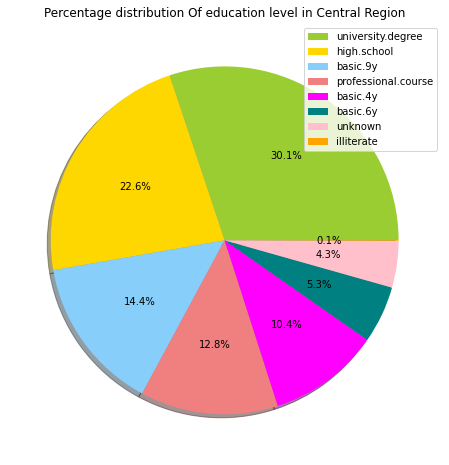

In [23]:
print("Percentage distribution of education level of people in Central Region:\n")
print((Region_central.education.value_counts()/Region_central.education.shape[0])*100)
plt.figure(figsize=(8,8))
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','magenta','teal','pink','orange']
legend=['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate']
plt.pie(Region_central.education.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of education level in Central Region")
plt.legend(legend)
plt.show()


Percentage distribution of education level of people in East Region:

university.degree      29.143777
high.school            23.167267
basic.9y               14.728168
professional.course    12.947528
basic.4y                9.859822
basic.6y                5.843910
unknown                 4.262171
illiterate              0.047357
Name: education, dtype: float64


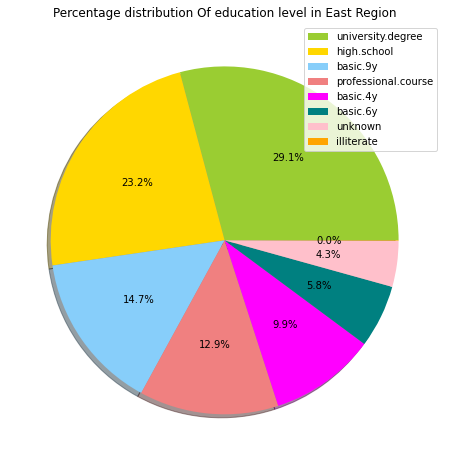

In [24]:
print("Percentage distribution of education level of people in East Region:\n")
print((Region_east.education.value_counts()/Region_east.education.shape[0])*100)
plt.figure(figsize=(8,8))
legend=['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate']
plt.pie(Region_east.education.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of education level in East Region")
plt.legend(legend)
plt.show()


Percentage distribution of education level of people in West Region:

university.degree      29.510266
high.school            23.056210
basic.9y               14.835072
professional.course    12.722989
basic.4y               10.114440
basic.6y                5.503198
unknown                 4.224167
illiterate              0.033659
Name: education, dtype: float64


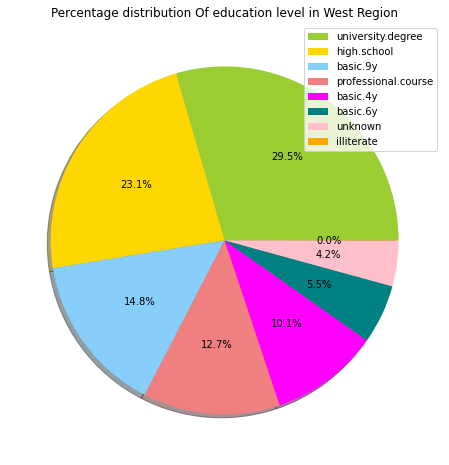

In [25]:
print("Percentage distribution of education level of people in West Region:\n")
print(bank[bank['Region']=='West']['education'].value_counts()/len(bank[bank['Region']=='West']['education'])*100)
legend=['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate']
plt.figure(figsize=(8,8))
plt.pie(Region_West.education.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of education level in West Region")
plt.legend(legend)
plt.show()

Percentage distribution of education level of people in South Region:

university.degree      29.672897
high.school            23.431242
basic.9y               14.352470
professional.course    12.733645
basic.4y               10.397196
basic.6y                5.690921
unknown                 3.688251
illiterate              0.033378
Name: education, dtype: float64


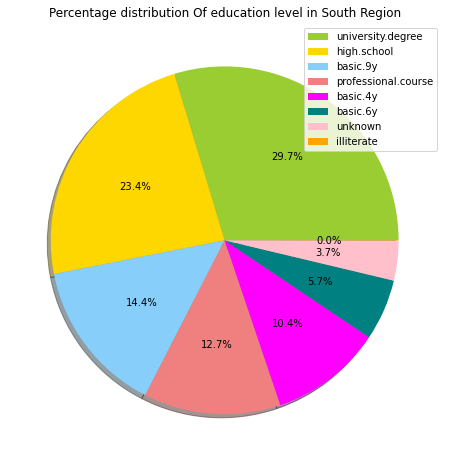

In [26]:
print("Percentage distribution of education level of people in South Region:\n")
print(bank[bank['Region']=='South']['education'].value_counts()/len(bank[bank['Region']=='South']['education'])*100)
plt.figure(figsize=(8,8))
legend=['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate']
plt.pie(Region_South.education.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of education level in South Region")
plt.legend(legend)
plt.show()

Percentage distribution of education level of people in Not_specified Region:

university.degree      35.000000
high.school            15.000000
basic.4y               15.000000
basic.9y               11.666667
basic.6y                8.333333
unknown                 8.333333
professional.course     6.666667
Name: education, dtype: float64


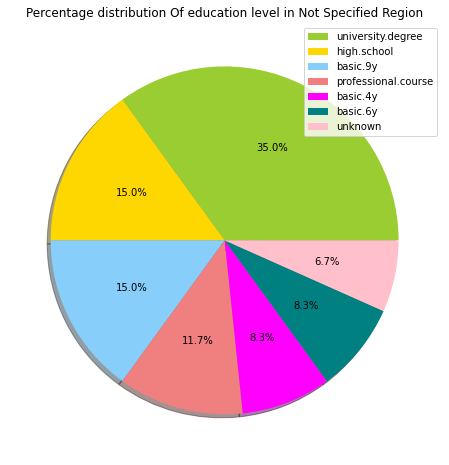

In [27]:
print("Percentage distribution of education level of people in Not_specified Region:\n")
print(bank[bank['Region']=='Not_Specified']['education'].value_counts()/len(bank[bank['Region']=='Not_Specified']['education'])*100)
legend=['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate']
plt.figure(figsize=(8,8))
plt.pie(Region_Not_specified.education.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of education level in Not Specified Region")
plt.legend(legend)
plt.show()

# What Is The Percentage distribution Of jobs In all the Regions?

Percentage distribution of jobs of people in Central Region:

admin.           25.715949
blue-collar      21.781141
technician       16.903376
services          9.045402
management        7.427241
retired           4.516880
self-employed     3.410943
entrepreneur      3.294529
housemaid         2.828871
unemployed        2.409779
student           1.757858
unknown           0.908033
Name: job, dtype: float64


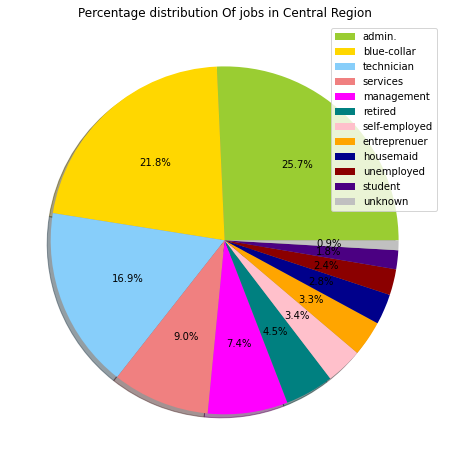

In [83]:
print("Percentage distribution of jobs of people in Central Region:\n")
print(bank[bank['Region']=='Central']['job'].value_counts()/len(bank[bank['Region']=='Central']['job'])*100)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','magenta','teal','pink','orange','darkblue','darkred','indigo','silver']
plt.figure(figsize=(8,8))
jobs = ['admin.','blue-collar','technician','services','management','retired','self-employed','entreprenuer','housemaid','unemployed','student','unknown']
plt.pie(Region_central.job.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of jobs in Central Region")
plt.legend(jobs)
plt.show()

Percentage distribution of jobs of people in West Region:

admin.           25.412319
blue-collar      22.214743
technician       16.189835
services          9.634803
management        6.933692
retired           4.081117
entrepreneur      3.862336
self-employed     3.500505
housemaid         2.532817
unemployed        2.457085
student           2.381353
unknown           0.799394
Name: job, dtype: float64


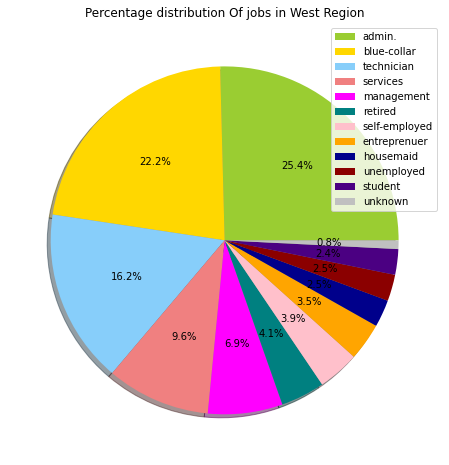

In [84]:
print("Percentage distribution of jobs of people in West Region:\n")
print(bank[bank['Region']=='West']['job'].value_counts()/len(bank[bank['Region']=='West']['job'])*100)
plt.figure(figsize=(8,8))
jobs = ['admin.','blue-collar','technician','services','management','retired','self-employed','entreprenuer','housemaid','unemployed','student','unknown']

plt.pie(Region_West.job.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of jobs in West Region")
plt.legend(jobs)
plt.show()

Percentage distribution of jobs of people in South Region:

admin.           25.033378
blue-collar      23.230975
technician       15.987984
services          9.963284
management        6.859146
retired           4.155541
entrepreneur      3.421228
self-employed     3.421228
unemployed        2.503338
housemaid         2.419893
student           2.303071
unknown           0.700935
Name: job, dtype: float64


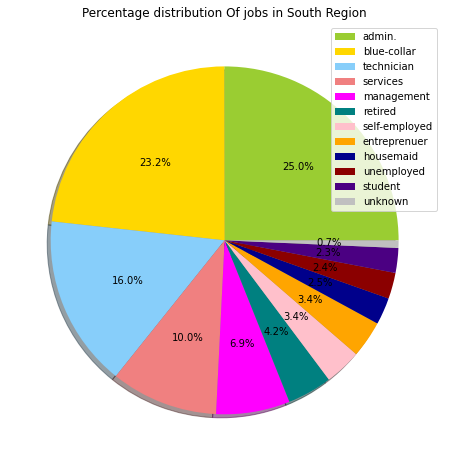

In [86]:
print("Percentage distribution of jobs of people in South Region:\n")
print(bank[bank['Region']=='South']['job'].value_counts()/len(bank[bank['Region']=='South']['job'])*100)
plt.figure(figsize=(8,8))
jobs = ['admin.','blue-collar','technician','services','management','retired','self-employed','entreprenuer','housemaid','unemployed','student','unknown']

plt.pie(Region_South.job.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of jobs in South Region")
plt.legend(jobs)
plt.show()

Percentage distribution of jobs of people in Not_Specified Region:

blue-collar      28.333333
admin.           28.333333
technician       15.000000
services          8.333333
housemaid         6.666667
entrepreneur      3.333333
self-employed     3.333333
management        3.333333
retired           3.333333
Name: job, dtype: float64


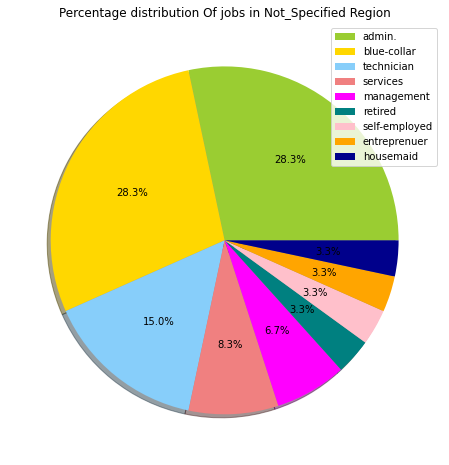

In [87]:
print("Percentage distribution of jobs of people in Not_Specified Region:\n")
print(bank[bank['Region']=='Not_Specified']['job'].value_counts()/len(bank[bank['Region']=='Not_Specified']['job'])*100)
plt.figure(figsize=(8,8))
jobs = ['admin.','blue-collar','technician','services','management','retired','self-employed','entreprenuer','housemaid','unemployed','student','unknown']

plt.pie(Region_Not_specified.job.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of jobs in Not_Specified Region")
plt.legend(jobs)
plt.show()

Percentage distribution of jobs of people in East Region:

admin.           25.326766
blue-collar      22.674749
technician       16.603523
services          9.689335
management        7.217276
retired           3.949612
entrepreneur      3.409737
self-employed     3.409737
unemployed        2.614131
housemaid         2.396287
student           1.846941
unknown           0.861906
Name: job, dtype: float64


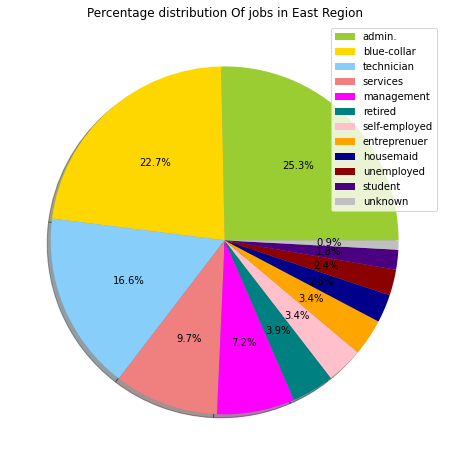

In [88]:
print("Percentage distribution of jobs of people in East Region:\n")
print(bank[bank['Region']=='East']['job'].value_counts()/len(bank[bank['Region']=='East']['job'])*100)
plt.figure(figsize=(8,8))
jobs = ['admin.','blue-collar','technician','services','management','retired','self-employed','entreprenuer','housemaid','unemployed','student','unknown']

plt.pie(Region_east.job.value_counts(),colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of jobs in East Region")
plt.legend(jobs)
plt.show()

# What Is The Percentage distribution Of marital status In all the Regions?

Percentage distribution of marital status of people in Central Region:

married     60.838184
single      27.916182
divorced    11.047730
unknown      0.197905
Name: marital, dtype: float64


C:\Users\ukfarooq\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

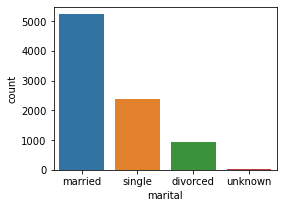

In [35]:
print("Percentage distribution of marital status of people in Central Region:\n")
print(bank[bank['Region']=='Central']['marital'].value_counts()/len(bank[bank['Region']=='Central']['marital'])*100)
plt.figure(figsize=(4,3))
sns.countplot(bank[bank['Region']=='Central']['marital'])

Percentage distribution of marital status of people in West Region:

married     59.971390
single      28.660384
divorced    11.191518
unknown      0.176708
Name: marital, dtype: float64


C:\Users\ukfarooq\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

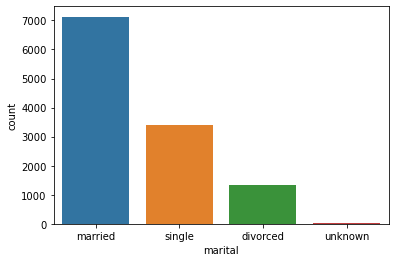

In [36]:
print("Percentage distribution of marital status of people in West Region:\n")
print(bank[bank['Region']=='West']['marital'].value_counts()/len(bank[bank['Region']=='West']['marital'])*100)
sns.countplot(bank[bank['Region']=='West']['marital'])

Percentage distribution of marital status of people in East Region:

married     60.996401
single      27.675696
divorced    11.110059
unknown      0.217844
Name: marital, dtype: float64


C:\Users\ukfarooq\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

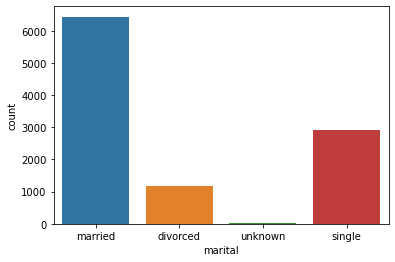

In [37]:
print("Percentage distribution of marital status of people in East Region:\n")
print(bank[bank['Region']=='East']['marital'].value_counts()/len(bank[bank['Region']=='East']['marital'])*100)
sns.countplot(bank[bank['Region']=='East']['marital'])

Percentage distribution of marital status of people in Not_Specidied Region:

married     53.333333
single      28.333333
divorced    18.333333
Name: marital, dtype: float64


<AxesSubplot:xlabel='marital', ylabel='count'>

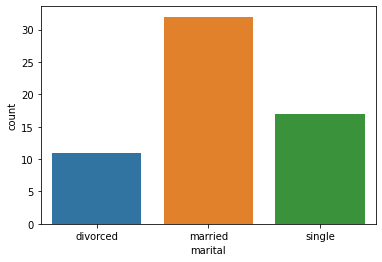

In [45]:
print("Percentage distribution of marital status of people in Not_Specidied Region:\n")
print(bank[bank['Region']=='Not_Specified']['marital'].value_counts()/len(bank[bank['Region']=='Not_Specified']['marital'])*100)
sns.countplot(bank[bank['Region']=='Not_Specified']['marital'])


Percentage distribution of marital status of people in South Region:

married     60.981308
single      27.770360
divorced    11.064753
unknown      0.183578
Name: marital, dtype: float64


<AxesSubplot:xlabel='marital', ylabel='count'>

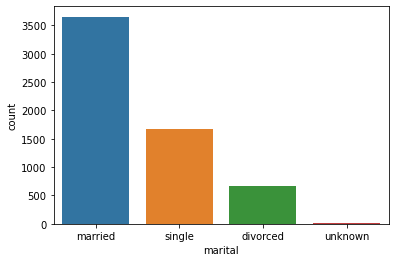

In [39]:
print("Percentage distribution of marital status of people in South Region:\n")
print(bank[bank['Region']=='South']['marital'].value_counts()/len(bank[bank['Region']=='South']['marital'])*100)
sns.countplot(bank[bank['Region']=='South']['marital'])